##**🛠️Preparação dos dados**

**Extração do Arquivo Tratado**

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/VitorTavares7/Challenge_TelecomX_alura/refs/heads/main/dados_tratados.csv'
dados = pd.read_csv(url)
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Diary
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


**Remoção de Colunas Irrelevantes**

In [4]:
dados = dados.drop(['customerID','Charges.Diary','Charges.Total'], axis=1)
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,0,Female,0,1,1,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6
1,0,Male,0,0,0,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9
2,1,Male,0,0,0,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9
3,1,Male,1,1,0,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0
4,1,Female,1,1,0,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9


**Encoding**

In [5]:
dados.nunique()

,0
Churn,2
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,0,Female,0,1,1,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6
1,0,Male,0,0,0,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9
2,1,Male,0,0,0,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9
3,1,Male,1,1,0,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0
4,1,Female,1,1,0,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9


In [8]:
variaveis_categoricas = ['gender', 'PhoneService',	'MultipleLines',	'InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract','PaymentMethod']

In [9]:
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'),
    variaveis_categoricas
),remainder='passthrough', sparse_threshold=0)

In [10]:
colunas = dados.columns
dados = one_hot.fit_transform(dados)
dados = pd.DataFrame(dados, columns=one_hot.get_feature_names_out(colunas))
dados.head()

,onehotencoder__gender_Male,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,...,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__Churn,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PaperlessBilling,remainder__Charges.Monthly
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,9.0,1.0,65.6
1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,59.9
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,73.9
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,13.0,1.0,98.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,83.9


**Verificação da Proporção de Evasão**

In [11]:
dados['remainder__Churn'].value_counts(normalize=True)

,proportion
remainder__Churn,
0.0,0.73463
1.0,0.26537


##*🎯 Correlação e Seleção de Variáveis*

**Análise de Correlação**

In [12]:
dados.corr().round(4)

,onehotencoder__gender_Male,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,...,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__Churn,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PaperlessBilling,remainder__Charges.Monthly
onehotencoder__gender_Male,1.0000,-0.0065,0.0045,0.0065,-0.0084,0.0066,-0.0113,0.0060,0.0104,0.0060,...,0.0012,0.0008,0.0137,-0.0086,-0.0019,-0.0018,0.0105,0.0051,-0.0118,-0.0146
onehotencoder__PhoneService_Yes,-0.0065,1.0000,0.3154,-1.0000,0.2797,-0.4524,0.2900,0.1722,-0.0579,0.1722,...,-0.0077,0.0031,-0.0033,0.0119,0.0086,0.0177,-0.0018,0.0084,0.0165,0.2474
onehotencoder__MultipleLines_No,0.0045,0.3154,1.0000,-0.3154,-0.8229,-0.0702,-0.1902,0.3100,-0.1180,0.3100,...,-0.0639,-0.0808,0.2226,-0.0326,-0.1362,-0.1299,0.0232,-0.3231,-0.1519,-0.3383
onehotencoder__MultipleLines_No phone service,0.0065,-1.0000,-0.3154,1.0000,-0.2797,0.4524,-0.2900,-0.1722,0.0579,-0.1722,...,0.0077,-0.0031,0.0033,-0.0119,-0.0086,-0.0177,0.0018,-0.0084,-0.0165,-0.2474
onehotencoder__MultipleLines_Yes,-0.0084,0.2797,-0.8229,-0.2797,1.0000,-0.1999,0.3661,-0.2106,0.0848,-0.2106,...,0.0600,0.0836,-0.2272,0.0401,0.1429,0.1421,-0.0245,0.3319,0.1635,0.4904
onehotencoder__InternetService_DSL,0.0066,-0.4524,-0.0702,0.4524,-0.1999,1.0000,-0.6410,-0.3806,0.0231,-0.3806,...,0.0514,-0.1044,0.0419,-0.1242,-0.1083,-0.0009,0.0520,0.0133,-0.0631,-0.1602
onehotencoder__InternetService_Fiber optic,-0.0113,0.2900,-0.1902,-0.2900,0.3661,-0.6410,1.0000,-0.4658,0.4116,-0.4658,...,-0.0501,0.3364,-0.3068,0.3080,0.2553,0.0003,-0.1658,0.0197,0.3269,0.7871
onehotencoder__InternetService_No,0.0060,0.1722,0.3100,-0.1722,-0.2106,-0.3806,-0.4658,1.0000,-0.5224,1.0000,...,0.0010,-0.2849,0.3214,-0.2279,-0.1827,0.0006,0.1398,-0.0391,-0.3210,-0.7636
onehotencoder__OnlineSecurity_No,0.0104,-0.0579,-0.1180,0.0579,0.0848,0.0231,0.4116,-0.5224,1.0000,-0.5224,...,-0.1055,0.3364,-0.1917,0.3426,0.1855,-0.1299,-0.1884,-0.2637,0.2678,0.3609
onehotencoder__OnlineSecurity_No internet service,0.0060,0.1722,0.3100,-0.1722,-0.2106,-0.3806,-0.4658,1.0000,-0.5224,1.0000,...,0.0010,-0.2849,0.3214,-0.2279,-0.1827,0.0006,0.1398,-0.0391,-0.3210,-0.7636


**Análises Direcionadas**

In [13]:
dados.corr()['remainder__Churn'].round(4)

,remainder__Churn
onehotencoder__gender_Male,-0.0086
onehotencoder__PhoneService_Yes,0.0119
onehotencoder__MultipleLines_No,-0.0326
onehotencoder__MultipleLines_No phone service,-0.0119
onehotencoder__MultipleLines_Yes,0.0401
onehotencoder__InternetService_DSL,-0.1242
onehotencoder__InternetService_Fiber optic,0.3080
onehotencoder__InternetService_No,-0.2279
onehotencoder__OnlineSecurity_No,0.3426
onehotencoder__OnlineSecurity_No internet service,-0.2279


In [14]:
dados = dados.drop(['onehotencoder__gender_Male', 'onehotencoder__MultipleLines_No phone service', 'onehotencoder__MultipleLines_No','onehotencoder__InternetService_No','onehotencoder__OnlineSecurity_No','onehotencoder__OnlineBackup_No internet service', 'onehotencoder__DeviceProtection_No internet service','onehotencoder__TechSupport_No internet service', 'onehotencoder__StreamingTV_No internet service', 'onehotencoder__StreamingMovies_No internet service'], axis=1)
dados.head()

,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_Yes,...,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__Churn,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PaperlessBilling,remainder__Charges.Monthly
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,9.0,1.0,65.6
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,59.9
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,73.9
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,13.0,1.0,98.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,83.9


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

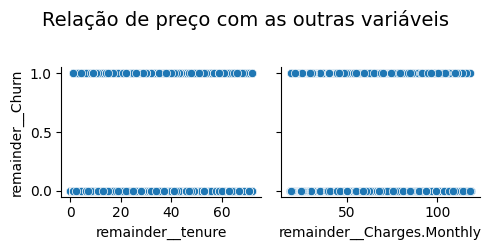

In [16]:
g = sns.pairplot(dados, y_vars='remainder__Churn', x_vars=['remainder__tenure', 'remainder__Charges.Monthly'])
g.fig.suptitle('Relação de preço com as outras variáveis', fontsize=14)
g.fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##**Modelagem Preditiva**

**Separação de Dados**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = dados.drop('remainder__Churn', axis=1)
y = dados['remainder__Churn']

In [19]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

**Criação de Modelos**

In [20]:
from sklearn.dummy import DummyClassifier

In [21]:
modelo_dummy = DummyClassifier()
modelo_dummy.fit(x_treino, y_treino)
modelo_dummy.score(x_teste, y_teste)

0.7352732434350603

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
modelo_arvore = DecisionTreeClassifier(max_depth=3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.7835344215755855

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
modelo_rf = RandomForestClassifier(max_depth=5)
modelo_rf.fit(x_treino, y_treino)
modelo_rf.score(x_teste, y_teste)

0.7920511000709723

**Avaliação dos Modelos**

In [26]:
from sklearn.metrics import classification_report

In [27]:
previsto_dummy = modelo_dummy.predict(x_teste)
previsto_arvore = modelo_arvore.predict(x_teste)
previsto_rf = modelo_rf.predict(x_teste)

In [28]:
print('Modelo Dummy')
print(classification_report(y_teste, previsto_dummy))
print('Modelo Árvore')
print(classification_report(y_teste, previsto_arvore))
print('Modelo Random Forest')
print(classification_report(y_teste, previsto_rf))

Modelo Dummy
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      1036
         1.0       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409

Modelo Árvore
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87      1036
         1.0       0.69      0.34      0.45       373

    accuracy                           0.78      1409
   macro avg       0.74      0.64      0.66      1409
weighted avg       0.77      0.78      0.76      1409

Modelo Random Forest
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1036
         1.0       0.66      0.44      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Modelo dummy


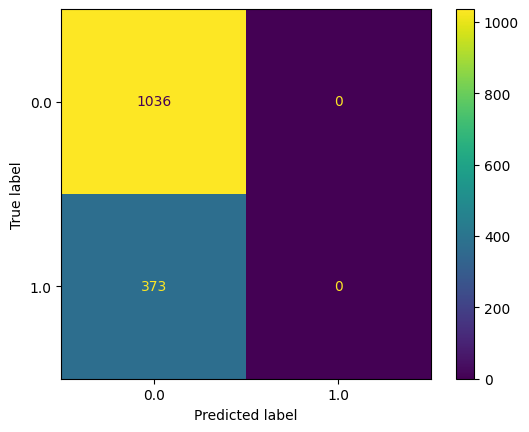

In [30]:
print('Modelo dummy')
ConfusionMatrixDisplay.from_predictions(y_teste, previsto_dummy);

Modelo Árvore


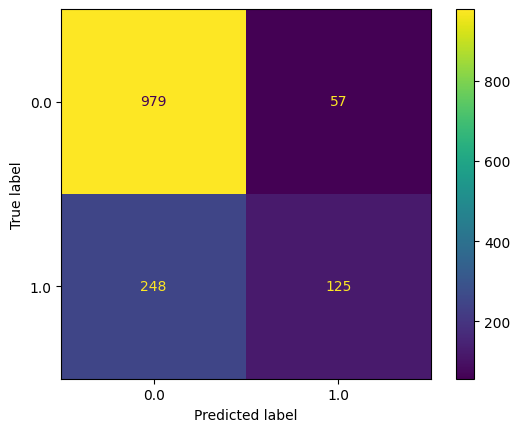

In [31]:
print('Modelo Árvore')
ConfusionMatrixDisplay.from_predictions(y_teste, previsto_arvore);

Modelo Random Forest


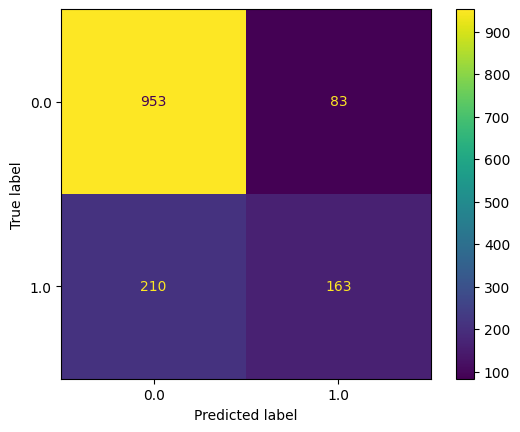

In [32]:
print('Modelo Random Forest')
ConfusionMatrixDisplay.from_predictions(y_teste, previsto_rf);

* Validação cruzada



In [33]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

In [34]:
def intervalo_conf(resultados,nome_algoritimo):
  media = resultados.mean()
  desvio_padrao = resultados.std()
  print(f'Intervalo de confiança({nome_algoritimo}): [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

In [35]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 5)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [36]:
resultados_arvore = cross_val_score(arvore, x_treino,y_treino, cv=skf, scoring='recall')
resultados_rf = cross_val_score(random_forest, x_treino,y_treino, cv=skf, scoring='recall')

In [37]:
intervalo_conf(resultados_arvore, 'Árvore')
intervalo_conf(resultados_rf, 'Random Forest')

Intervalo de confiança(Árvore): [0.32726241576443094, 0.42941539917425353]
Intervalo de confiança(Random Forest): [0.3763080229612087, 0.5154110405839419]


* balanceamento e pipeline

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbpipeline

In [39]:
modelo_tree = DecisionTreeClassifier(max_depth=3)
modelo_rf = RandomForestClassifier(max_depth=5)

In [41]:
pipeline_arvore_oversample = imbpipeline([('oversample',SMOTE()),('arvore',modelo_tree)])
pipeline_rf_oversample = imbpipeline([('oversample',SMOTE()),('random_forest',modelo_rf)])

In [42]:
pipeline_arvore_undersample = imbpipeline([('undersample',NearMiss(version=3)),('arvore',modelo_tree)])
pipeline_rf_undersample = imbpipeline([('undersample',NearMiss(version=3)),('random_forest',modelo_rf)])

In [43]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados_arvore_oversample = cross_val_score(pipeline_arvore_oversample, x_treino,y_treino, cv=skf, scoring='recall')
resultados_rf_oversample = cross_val_score(pipeline_rf_oversample, x_treino,y_treino, cv=skf, scoring='recall')

In [44]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resultados_arvore_undersample = cross_val_score(pipeline_arvore_undersample, x_treino,y_treino, cv=skf, scoring='recall')
resultados_rf_undersample = cross_val_score(pipeline_rf_undersample, x_treino,y_treino, cv=skf, scoring='recall')

In [48]:
print(f'Recall (Decision Tree com oversample):{resultados_arvore_oversample.mean()}')
print(f'Recall (Random Forest com oversample):{resultados_rf_oversample.mean()}')

Recall (Decision Tree com oversample):0.6483433667781494
Recall (Random Forest com oversample):0.717901895206243


In [49]:
print(f'Recall (Decision Tree com undersample):{resultados_arvore_undersample.mean()}')
print(f'Recall (Random Forest com undersample):{resultados_rf_undersample.mean()}')

Recall (Decision Tree com undersample):0.6764771460423633
Recall (Random Forest com undersample):0.6784570791527313


* Escolhendo modelo

              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      1036
         1.0       0.55      0.71      0.62       373

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.78      1409



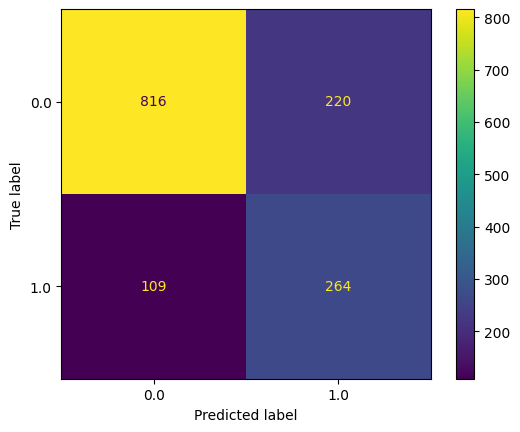

In [50]:
oversample =  SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x_treino,y_treino)

modelo_definitivo = RandomForestClassifier(max_depth = 5)
modelo_definitivo.fit(x_balanceado, y_balanceado)
y_previsto = modelo_definitivo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

##**📋 Interpretação e Conclusões**

**Análise de Importância das Variáveis**

In [51]:
importancias = pd.DataFrame({
    'variavel': x.columns,
    'importancia': modelo_definitivo.feature_importances_
})

importancias = importancias.sort_values(by='importancia', ascending=False)

print(importancias)

                                             variavel  importancia
16             onehotencoder__Contract_Month-to-month     0.180382
21      onehotencoder__PaymentMethod_Electronic check     0.141779
10                      onehotencoder__TechSupport_No     0.138510
26                                  remainder__tenure     0.080133
18                   onehotencoder__Contract_Two year     0.072202
6                      onehotencoder__OnlineBackup_No     0.049943
8                  onehotencoder__DeviceProtection_No     0.047931
17                   onehotencoder__Contract_One year     0.045964
27                        remainder__PaperlessBilling     0.042441
3          onehotencoder__InternetService_Fiber optic     0.031056
5                   onehotencoder__OnlineSecurity_Yes     0.027433
11                     onehotencoder__TechSupport_Yes     0.025875
25                              remainder__Dependents     0.014747
28                         remainder__Charges.Monthly     0.01

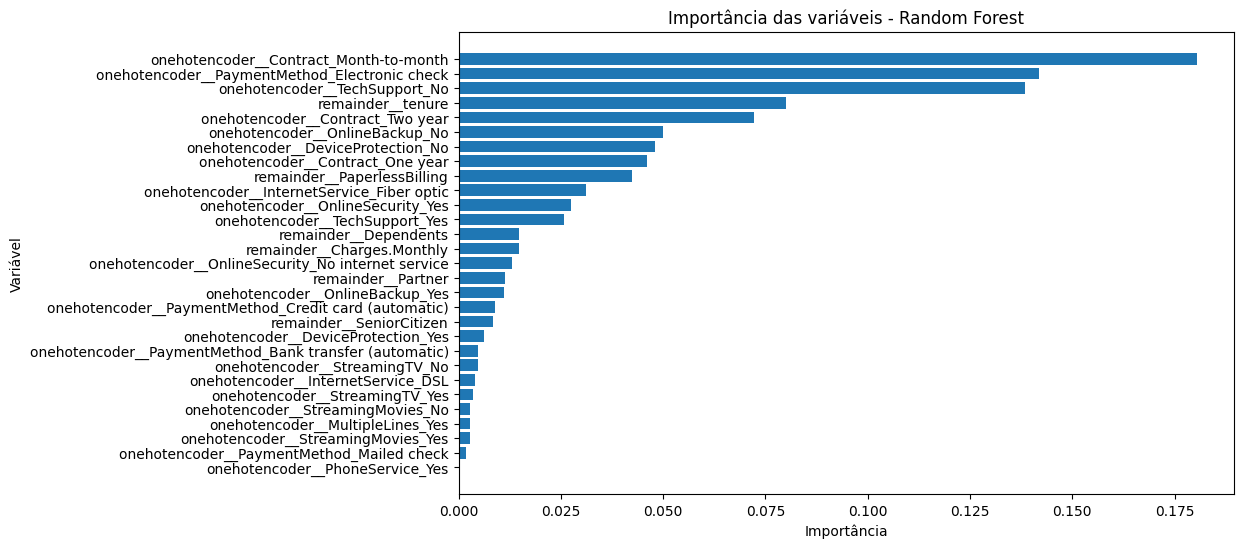

In [52]:
plt.figure(figsize=(10, 6))
plt.barh(importancias['variavel'], importancias['importancia'])
plt.gca().invert_yaxis()  # Inverter para mostrar a mais importante no topo
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância das variáveis - Random Forest')
plt.show()

* Salvando o modelo

In [53]:
import pickle

In [54]:
with open('modelo_OneHotEnc.pkl','wb') as arquivo:
  pickle.dump(one_hot, arquivo)

with open('modelo_definitivo.pkl','wb') as arquivo:
  pickle.dump(modelo_definitivo, arquivo)

#📄Relatorio Final

Nesta análise de evasão de clientes da **TelecomX**, utilizamos um modelo **RandomForestClassifier** com balanceamento dos dados por meio da estratégia **over_sampling**, obtendo uma média de **Recall** de aproximadamente **0,70**.  

A partir da matriz e da visualização da importância das variáveis, observamos que três fatores se destacam como os mais influentes na probabilidade de evasão:  

1. **Tipo de contrato** (mês a mês ou de longo prazo)  
2. **Forma de pagamento** escolhida pelo cliente  
3. **Assinatura do suporte técnico mais rápido**  

Essas variáveis apresentaram impacto significativo na decisão do cliente de permanecer ou não com a empresa. Outras variáveis explicativas também mostraram relação com a evasão, mas com importância relativamente menor, conforme evidenciado no gráfico apresentado anteriormente.